# Exploratory Data Analysis - Ryanair Customer Query Classification
### **Objective**: Understand the dataset structure, distribution, and patterns to inform model development strategy.
### **Author**: Enes Ozyaramıs 
### **Date**: 20/07/2025

# Table of Contents
### 1. [Data Loading & Basic Info]
### 2. [Dataset Overview]
### 3. [Label Distribution Analysis]
### 4. [Text Analysis]
### 5. [Data Quality Assessment]
### 6. [Key Insights & Next Steps]

In [23]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import os
import warnings
warnings.filterwarnings('ignore')

# NLP libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import re
from wordcloud import WordCloud

# Download NLTK data
try:
    nltk.data.find('tokenizers/punkt_tab')
except LookupError:
    nltk.download('punkt_tab')

try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')

try:
    nltk.data.find('corpora/stopwords')
except LookupError:
    nltk.download('stopwords')

# Style settings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

print("All libraries imported successfully!")

All libraries imported successfully!


##  1. Data Loading & Basic Info

In [24]:
# Load datasets
ROOT = os.path.abspath(os.path.join(os.getcwd(), '..'))
train_path = os.path.join(ROOT, 'data', 'raw', 'customer_queries_data.csv')
test_path  = os.path.join(ROOT, 'data', 'raw', 'customer_queries_test.csv')
train_data = pd.read_csv(train_path)
test_data  = pd.read_csv(test_path)
print("Data Loading Summary")
print("=" * 50)
print(f"Training set shape: {train_data.shape}")
print(f"Test set shape: {test_data.shape}")
print(f"Training columns: {list(train_data.columns)}")
print(f"Test columns: {list(test_data.columns)}")

Data Loading Summary
Training set shape: (20000, 2)
Test set shape: (5977, 1)
Training columns: ['query', 'label']
Test columns: ['query']


In [26]:
# Display first few rows
print("Training Data Sample:")
print(train_data.head())
print("\nTest Data Sample:")
print(test_data.head())

Training Data Sample:
                                               query                    label
0  I'm having trouble accessing my Ryanair custom...  Customer Account Issues
1         Can I change my flight date after booking?           Flight Changes
2           Why was my credit card payment rejected?           Payment Issues
3  How can I change the date of my flight reserva...           Flight Changes
4  What are the policies for traveling with an in...  Child and Infant Travel

Test Data Sample:
                                               query
0  Am I able to choose my seat during the flight ...
1  Am I eligible for a refund if my flight is can...
2                   Any current travel restrictions?
3                      App crashes on startup. Help!
4            Are animals allowed on Ryanair flights?


In [27]:
# Basic information about datasets
print("Training Data Info:")
print(train_data.info())
print("\nTest Data Info:")
print(test_data.info())

Training Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   query   5000 non-null   object
 1   label   5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB
None

Test Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   query   1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB
None


##  2. Dataset Overview

In [28]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 40)
print("Training Data:")
print(train_data.isnull().sum())
print("\nTest Data:")
print(test_data.isnull().sum())

Missing Values Analysis:
Training Data:
query    0
label    0
dtype: int64

Test Data:
query    0
dtype: int64


In [29]:
# Check for duplicates
print("Duplicate Analysis:")
print("=" * 30)
train_duplicates = train_data.duplicated().sum()
test_duplicates = test_data.duplicated().sum()
print(f"Training set duplicates: {train_duplicates}")
print(f"Test set duplicates: {test_duplicates}")

if train_duplicates > 0:
    print("\n Sample duplicate queries:")
    duplicate_queries = train_data[train_data.duplicated(subset=['query'], keep=False)]
    print(duplicate_queries.head())

Duplicate Analysis:
Training set duplicates: 0
Test set duplicates: 1


In [30]:
dup = test_data[test_data.duplicated(subset=['query'], keep=False)]
print(dup)

                                                 query
867  Can I earn loyalty points on all Ryanair flights?
868  Can I earn loyalty points on all Ryanair flights?


In [31]:
test_data = test_data.drop_duplicates(subset=['query'], keep='first').reset_index(drop=True)

##  3. Label Distribution Analysis

In [32]:
# Analyze label distribution
label_counts = train_data['label'].value_counts()
print(" Label Distribution:")
print("=" * 30)
print(f"Total unique labels: {len(label_counts)}")
print(f"Most common label: {label_counts.index[0]} ({label_counts.iloc[0]} samples)")
print(f"Least common label: {label_counts.index[-1]} ({label_counts.iloc[-1]} samples)")
print(f"\nClass balance ratio (max/min): {label_counts.iloc[0] / label_counts.iloc[-1]:.2f}")

 Label Distribution:
Total unique labels: 30
Most common label: Complaints and Feedback (236 samples)
Least common label: Partnerships and Alliances (105 samples)

Class balance ratio (max/min): 2.25


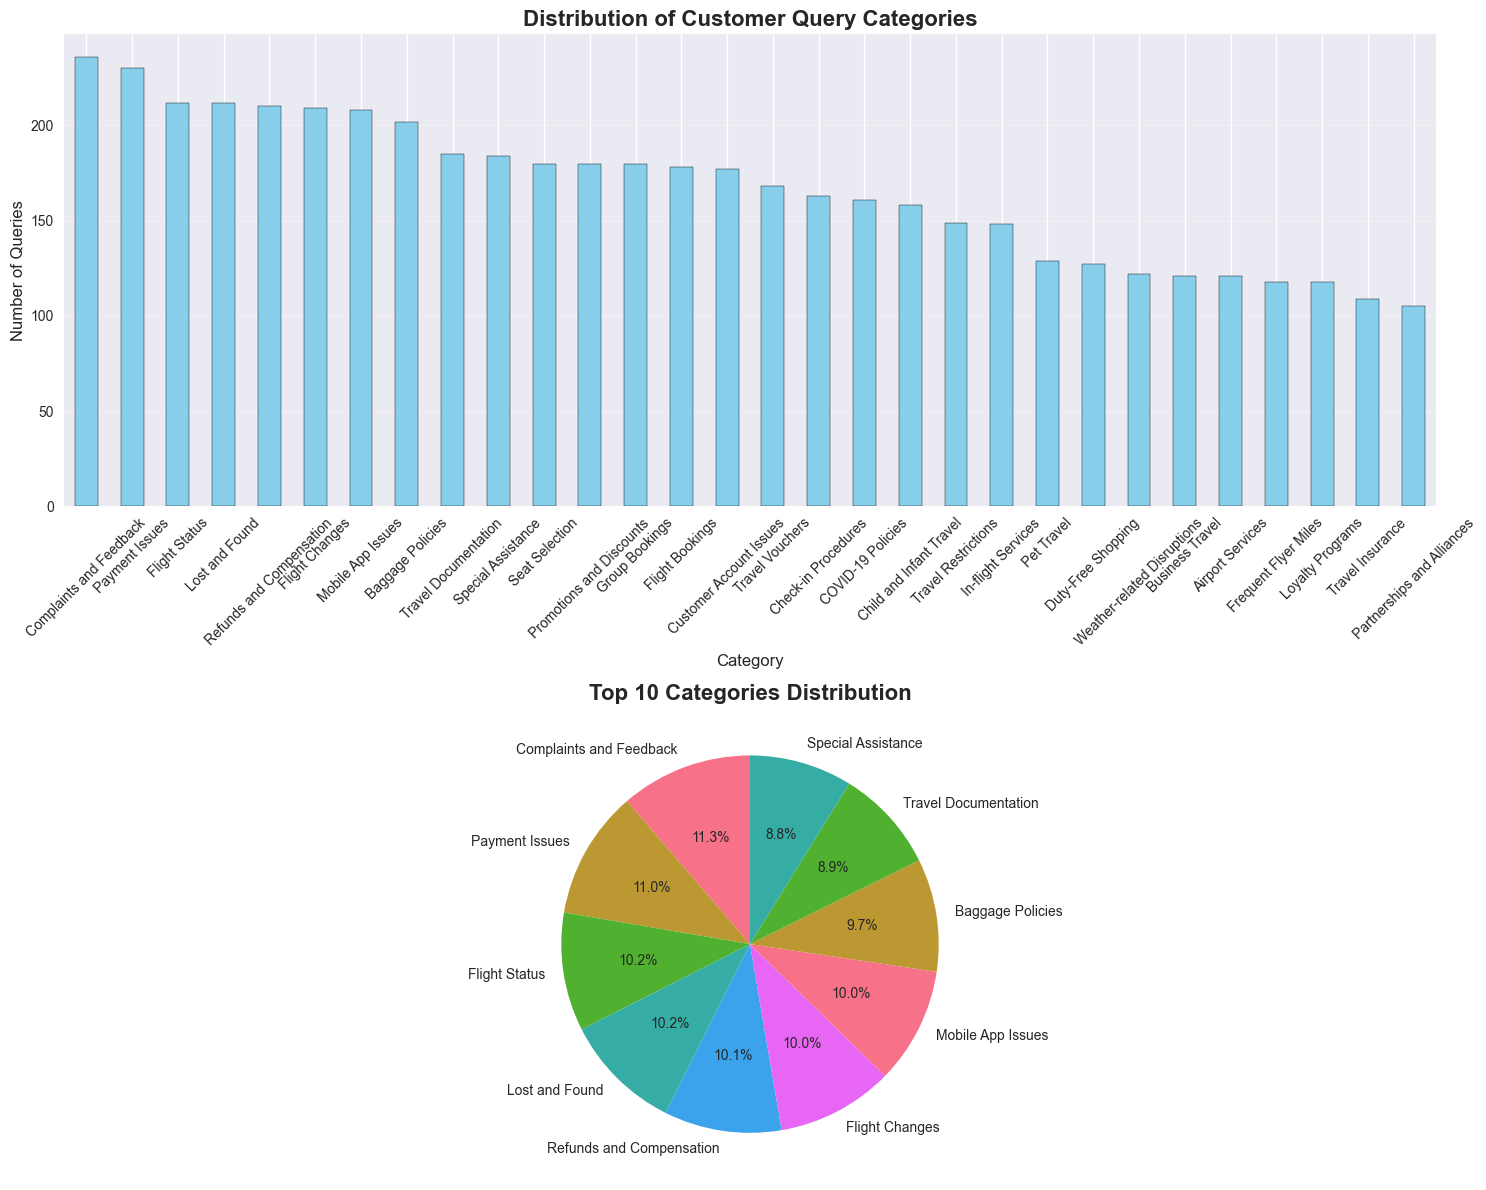

In [33]:
# Visualize label distribution
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12))

# Bar plot
label_counts.plot(kind='bar', ax=ax1, color='skyblue', edgecolor='black')
ax1.set_title('Distribution of Customer Query Categories', fontsize=16, fontweight='bold')
ax1.set_xlabel('Category', fontsize=12)
ax1.set_ylabel('Number of Queries', fontsize=12)
ax1.tick_params(axis='x', rotation=45)
ax1.grid(axis='y', alpha=0.3)

# Pie chart for top 10 categories
top_10_labels = label_counts.head(10)
ax2.pie(top_10_labels.values, labels=top_10_labels.index, autopct='%1.1f%%', startangle=90)
ax2.set_title('Top 10 Categories Distribution', fontsize=16, fontweight='bold')

plt.tight_layout()
plt.savefig('../reports/figures/label_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [34]:
# Statistical summary of label distribution
print("Label Distribution Statistics:")
print("=" * 40)
print(f"Mean samples per class: {label_counts.mean():.2f}")
print(f"Median samples per class: {label_counts.median():.2f}")
print(f"Standard deviation: {label_counts.std():.2f}")
print(f"Min samples: {label_counts.min()}")
print(f"Max samples: {label_counts.max()}")

# Calculate class imbalance
percentages = (label_counts / len(train_data) * 100).round(2)
print(f"\nClass percentage range: {percentages.min():.2f}% - {percentages.max():.2f}%")

Label Distribution Statistics:
Mean samples per class: 166.67
Median samples per class: 172.50
Standard deviation: 38.40
Min samples: 105
Max samples: 236

Class percentage range: 2.10% - 4.72%


## 4. Text Analysis

In [35]:
# Text length analysis
train_data['query_length'] = train_data['query'].str.len()
train_data['word_count'] = train_data['query'].str.split().str.len()

print(" Text Length Statistics:")
print("=" * 35)
print("Character length:")
print(train_data['query_length'].describe())
print("\nWord count:")
print(train_data['word_count'].describe())

 Text Length Statistics:
Character length:
count    5000.000000
mean       71.799600
std        31.043257
min        22.000000
25%        52.000000
50%        61.000000
75%        81.000000
max       261.000000
Name: query_length, dtype: float64

Word count:
count    5000.00000
mean       12.91640
std         5.35854
min         4.00000
25%         9.00000
50%        11.00000
75%        15.00000
max        44.00000
Name: word_count, dtype: float64


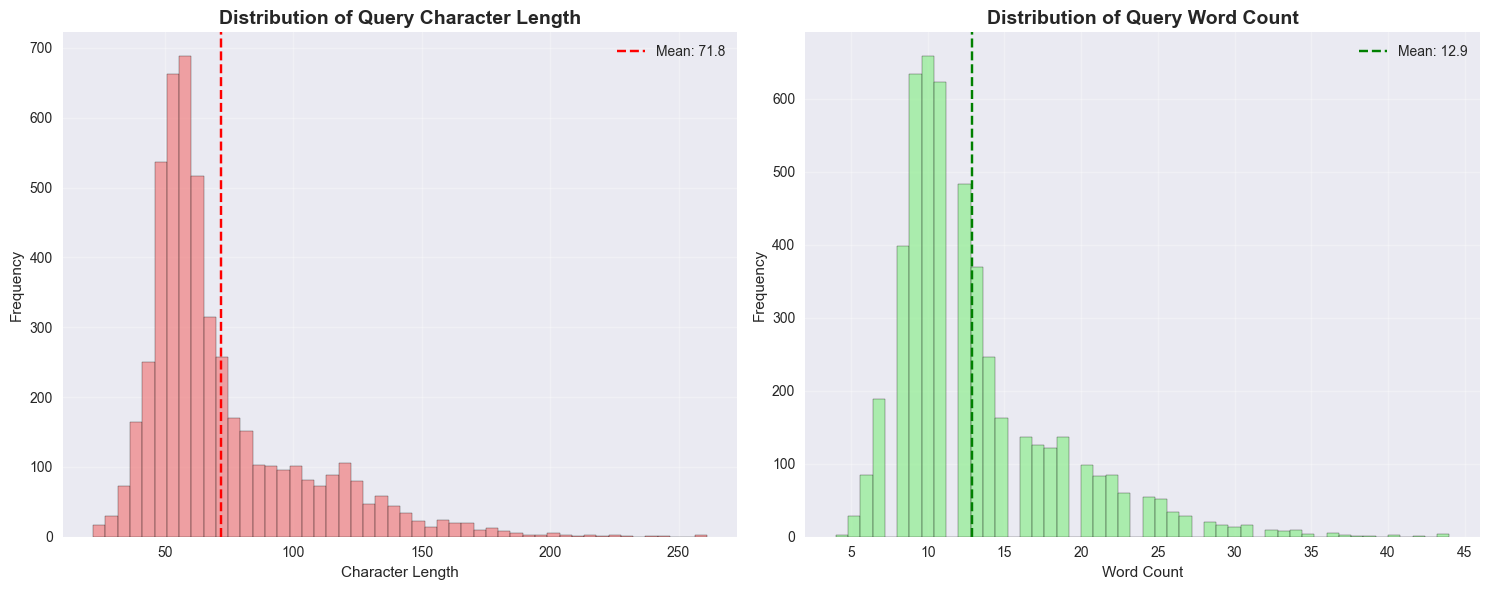

In [36]:
# Visualize text length distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Character length distribution
ax1.hist(train_data['query_length'], bins=50, color='lightcoral', alpha=0.7, edgecolor='black')
ax1.set_title('Distribution of Query Character Length', fontsize=14, fontweight='bold')
ax1.set_xlabel('Character Length')
ax1.set_ylabel('Frequency')
ax1.axvline(train_data['query_length'].mean(), color='red', linestyle='--', label=f'Mean: {train_data["query_length"].mean():.1f}')
ax1.legend()
ax1.grid(alpha=0.3)

# Word count distribution
ax2.hist(train_data['word_count'], bins=50, color='lightgreen', alpha=0.7, edgecolor='black')
ax2.set_title('Distribution of Query Word Count', fontsize=14, fontweight='bold')
ax2.set_xlabel('Word Count')
ax2.set_ylabel('Frequency')
ax2.axvline(train_data['word_count'].mean(), color='green', linestyle='--', label=f'Mean: {train_data["word_count"].mean():.1f}')
ax2.legend()
ax2.grid(alpha=0.3)

plt.tight_layout()
plt.savefig('../reports/figures/text_length_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

In [37]:
# Text length by category analysis
category_text_stats = train_data.groupby('label').agg({
    'query_length': ['mean', 'median', 'std'],
    'word_count': ['mean', 'median', 'std']
}).round(2)

print(" Text Statistics by Category (Top 10):")
print("=" * 50)
top_categories = label_counts.head(10).index
print(category_text_stats.loc[top_categories])

 Text Statistics by Category (Top 10):
                         query_length               word_count             
                                 mean median    std       mean median   std
label                                                                      
Complaints and Feedback         72.26   65.5  25.68      13.33   12.0  4.62
Payment Issues                  68.91   60.0  26.95      12.73   11.0  4.70
Flight Status                   60.86   55.5  19.96      12.14   11.0  3.95
Lost and Found                  62.08   55.5  22.80      13.58   12.0  4.48
Refunds and Compensation        71.93   63.5  29.20      13.80   12.0  5.40
Flight Changes                  65.96   56.0  31.25      12.79   11.0  5.89
Mobile App Issues               67.47   58.5  27.65      12.46   11.0  4.73
Baggage Policies                69.24   58.0  33.50      12.11   10.0  5.86
Travel Documentation            72.46   63.0  29.32      12.62   11.0  4.96
Special Assistance              76.02   68.0  25.

In [38]:
# Analyze common words across all queries
stop_words = set(stopwords.words('english'))

def get_common_words(text_series, n=20):
    """Extract most common words from text series."""
    all_text = ' '.join(text_series.astype(str))
    words = word_tokenize(all_text.lower())
    words = [word for word in words if word.isalpha() and word not in stop_words]
    return Counter(words).most_common(n)

common_words = get_common_words(train_data['query'])
print("Most Common Words (excluding stop words):")
print("=" * 45)
for word, count in common_words:
    print(f"{word}: {count}")

Most Common Words (excluding stop words):
ryanair: 2821
flight: 2059
travel: 716
booking: 599
flights: 578
need: 483
available: 336
special: 335
book: 305
services: 296
restrictions: 233
app: 228
payment: 219
help: 209
traveling: 208
refund: 208
provide: 207
airport: 206
process: 206
group: 205


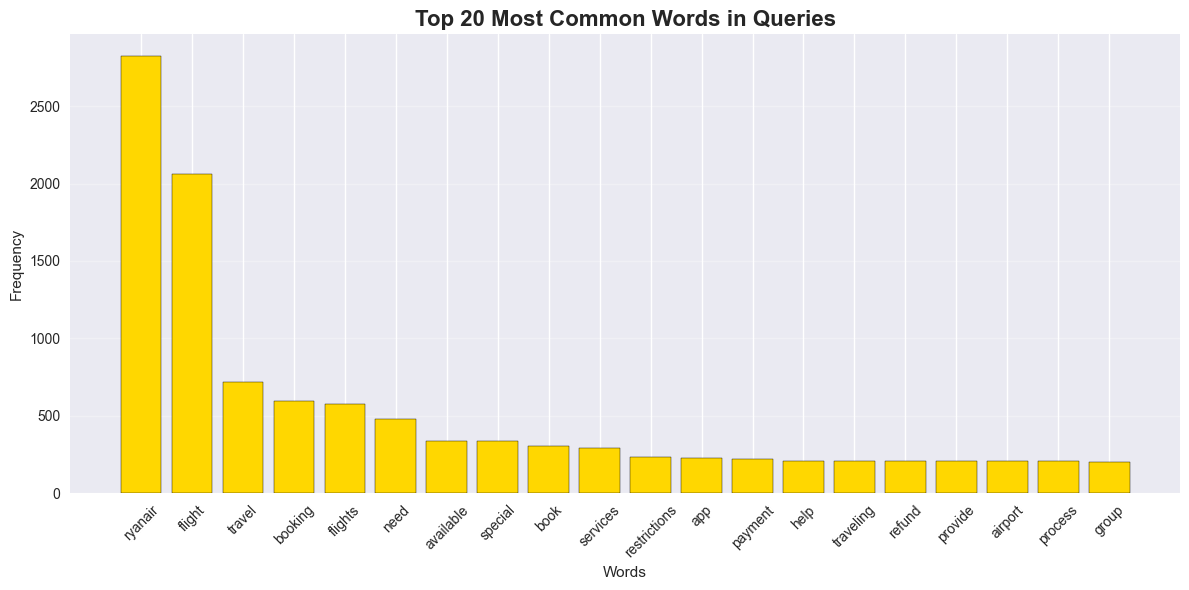

In [39]:
# Visualize common words
words, counts = zip(*common_words)
plt.figure(figsize=(12, 6))
plt.bar(words, counts, color='gold', edgecolor='black')
plt.title('Top 20 Most Common Words in Queries', fontsize=16, fontweight='bold')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../reports/figures/common_words.png', dpi=300, bbox_inches='tight')
plt.show()

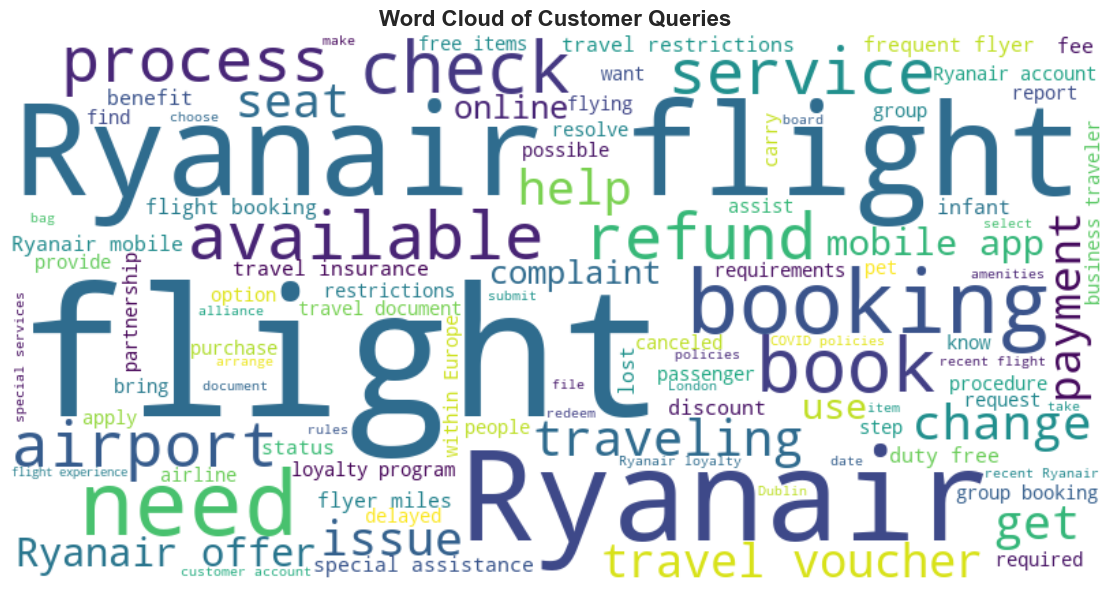

In [40]:
# Create word cloud
wordcloud_text = ' '.join(train_data['query'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white', 
                     stopwords=stop_words, max_words=100, colormap='viridis').generate(wordcloud_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Customer Queries', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.savefig('../reports/figures/wordcloud.png', dpi=300, bbox_inches='tight')
plt.show()

In [41]:
# Common words by category (for top 5 categories)
print(" Common Words by Top Categories:")
print("=" * 40)
top_5_categories = label_counts.head(5).index

for category in top_5_categories:
    category_queries = train_data[train_data['label'] == category]['query']
    category_words = get_common_words(category_queries, n=10)
    print(f"\n{category}:")
    words_str = ', '.join([f"{word} ({count})" for word, count in category_words[:5]])
    print(f"  {words_str}")


 Common Words by Top Categories:

Complaints and Feedback:
  flight (183), complaint (153), feedback (152), ryanair (123), recent (120)

Payment Issues:
  payment (217), flight (106), booking (88), ryanair (76), issue (62)

Flight Status:
  flight (213), status (147), check (87), ryanair (71), delayed (42)

Lost and Found:
  lost (183), flight (119), ryanair (81), report (73), item (68)

Refunds and Compensation:
  refund (187), flight (169), ryanair (99), canceled (87), get (59)


##  5. Data Quality Assessment

In [42]:
# Check for very short or very long queries
print("Data Quality Issues:")
print("=" * 30)

very_short = train_data[train_data['word_count'] <= 2]
very_long = train_data[train_data['word_count'] >= 50]

print(f"Very short queries (≤2 words): {len(very_short)}")
print(f"Very long queries (≥50 words): {len(very_long)}")

if len(very_short) > 0:
    print("\nSample short queries:")
    print(very_short[['query', 'label']].head())

if len(very_long) > 0:
    print("\nSample long queries:")
    print(very_long[['query', 'label']].head())

Data Quality Issues:
Very short queries (≤2 words): 0
Very long queries (≥50 words): 0


In [43]:
# Check for potential data quality issues
print("Additional Quality Checks:")
print("=" * 35)

# Queries with only punctuation or numbers
pattern_issues = train_data[train_data['query'].str.match(r'^[^a-zA-Z]*$')]
print(f"Queries with no letters: {len(pattern_issues)}")

# Queries with unusual characters
special_chars = train_data[train_data['query'].str.contains(r'[^a-zA-Z0-9\s\.\,\?\!\'\"\-\(\)]')]
print(f"Queries with special characters: {len(special_chars)}")

# Empty or whitespace-only queries
empty_queries = train_data[train_data['query'].str.strip() == '']
print(f"Empty queries: {len(empty_queries)}")

Additional Quality Checks:
Queries with no letters: 0
Queries with special characters: 1
Empty queries: 0


## 6. Key Insights & Next Steps

In [44]:
print("KEY INSIGHTS FROM EDA:")
print("=" * 50)
print(f" Dataset Size: {len(train_data):,} training samples, {len(test_data):,} test samples")
print(f" Number of Categories: {len(label_counts)} distinct categories")
print(f" Class Balance: Relatively balanced (ratio: {label_counts.iloc[0] / label_counts.iloc[-1]:.2f}:1)")
print(f" Text Characteristics:")
print(f"   • Average query length: {train_data['query_length'].mean():.1f} characters")
print(f"   • Average word count: {train_data['word_count'].mean():.1f} words")
print(f"   • Text range: {train_data['word_count'].min()}-{train_data['word_count'].max()} words")
print(f" Data Quality: {len(train_data) - very_short.shape[0] - very_long.shape[0]:,} good quality samples")

KEY INSIGHTS FROM EDA:
 Dataset Size: 5,000 training samples, 999 test samples
 Number of Categories: 30 distinct categories
 Class Balance: Relatively balanced (ratio: 2.25:1)
 Text Characteristics:
   • Average query length: 71.8 characters
   • Average word count: 12.9 words
   • Text range: 4-44 words
 Data Quality: 5,000 good quality samples


In [45]:
# Save processed insights for next notebooks
insights_summary = {
    'total_samples': len(train_data),
    'num_categories': len(label_counts),
    'class_balance_ratio': label_counts.iloc[0] / label_counts.iloc[-1],
    'avg_query_length': train_data['query_length'].mean(),
    'avg_word_count': train_data['word_count'].mean(),
    'quality_issues': {
        'very_short': len(very_short),
        'very_long': len(very_long),
        'special_chars': len(special_chars)
    },
    'top_categories': label_counts.head(10).to_dict()
}

# Save insights to file
import json
with open('../reports/eda_insights.json', 'w') as f:
    json.dump(insights_summary, f, indent=2)

print("EDA insights saved to '../reports/eda_insights.json'")
print("\n Exploratory Data Analysis Complete!")
print("Next: Run 02_data_preprocessing.ipynb")

EDA insights saved to '../reports/eda_insights.json'

 Exploratory Data Analysis Complete!
Next: Run 02_data_preprocessing.ipynb
